In [131]:
#imports
import featuretools as ft
import pandas as pd
import numpy as np
from tensorflow import keras
from keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers
from tensorflow.keras.callbacks import LambdaCallback
from tensorflow.keras.constraints import MaxNorm
from featuretools.primitives import make_trans_primitive
from featuretools.variable_types import Numeric
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
from sklearn import manifold, datasets
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier
from sklearn import utils
from sklearn import tree
from sklearn.manifold import TSNE
import sklearn
from sklearn.decomposition import PCA
from time import time
import os
import json


In [57]:
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

In [2]:
def min_max_norm(x):
    num_features = len(x[0, :])
    for i in range(0, num_features):
        min_x = min(x[:, i])
        max_x = max(x[:, i])
        x[:, i] = (x[:, i] - min_x) / (max_x - min_x)
    return x


data = np.load('new_data_shuffled.npy', allow_pickle=True)
data = np.asarray(data)

# Normalize all the features
data[:, 0:n] = min_max_norm(data[:, 0:n])


# Training set
x_train = data[0:train_size, 0:n]
labels_train = data[0:train_size, n]
y_train = data[0:train_size, n]

# testing set
x_test = data[train_size:, 0:n]
labels_test = data[train_size:, n]
y_test = data[train_size:, n]


In [72]:
max(y_train)

4

In [339]:
clf = LogisticRegression(penalty='l2', solver='newton-cg', multi_class='multinomial', max_iter=19)
clfAlt = tree.DecisionTreeClassifier()

In [340]:
lab_enc = preprocessing.LabelEncoder()

In [341]:
encoded = lab_enc.fit_transform(y_train)

In [342]:
encoded_test = lab_enc.fit_transform(y_test)

In [343]:
len(encoded)

9895

In [344]:
clf.fit(x_train,encoded)
clfAlt.fit(x_train,encoded)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [335]:
clf.predict_proba(x_test)[0]


array([0.03553921, 0.27008723, 0.2695401 , 0.17527417, 0.2495593 ])

In [336]:
encoded_test[0]

3

In [351]:
clf.score(x_train,encoded)

0.3613946437594745

In [346]:
clf.score(x_test,encoded_test)

0.3346410357002746

In [13]:

# Save the model
#model.save('model3.h5')

In [19]:
rfc = RandomForestClassifier(n_estimators=100, max_depth=2,random_state=0)

In [20]:
rfc.fit(x_train, encoded)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=2, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [21]:
rfc.feature_importances_

array([3.14245880e-01, 1.26319403e-01, 6.36234312e-03, 3.41967893e-03,
       3.40264961e-03, 9.43161182e-04, 2.28257677e-04, 1.78027342e-02,
       3.53342503e-02, 4.44122034e-02, 1.67171210e-02, 2.17504700e-01,
       1.86814145e-02, 7.98353883e-03, 2.45925420e-02, 1.42271990e-01,
       8.44433765e-03, 7.78452904e-03, 3.54926586e-03])

In [22]:
rfc.predict(x_train)

array([4, 4, 2, ..., 2, 2, 4])

In [24]:
rfc.score(x_train,encoded)

0.35795856493178374

In [78]:
x_embedded = TSNE(verbose=1,perplexity=40,n_iter=300).fit_transform(x_train)

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 9895 samples in 0.053s...
[t-SNE] Computed neighbors for 9895 samples in 2.759s...
[t-SNE] Computed conditional probabilities for sample 1000 / 9895
[t-SNE] Computed conditional probabilities for sample 2000 / 9895
[t-SNE] Computed conditional probabilities for sample 3000 / 9895
[t-SNE] Computed conditional probabilities for sample 4000 / 9895
[t-SNE] Computed conditional probabilities for sample 5000 / 9895
[t-SNE] Computed conditional probabilities for sample 6000 / 9895
[t-SNE] Computed conditional probabilities for sample 7000 / 9895
[t-SNE] Computed conditional probabilities for sample 8000 / 9895
[t-SNE] Computed conditional probabilities for sample 9000 / 9895
[t-SNE] Computed conditional probabilities for sample 9895 / 9895
[t-SNE] Mean sigma: 0.298732
[t-SNE] KL divergence after 250 iterations with early exaggeration: 74.452965
[t-SNE] KL divergence after 300 iterations: 2.339748


In [79]:
x_embedded.shape

(9895, 2)

In [83]:
vis_x = x_embedded[:,0]
vis_y = x_embedded[:,1]
df_subset = pd.DataFrame()
df_subset['tsne-2d-one'] = vis_x
df_subset['tsne-2d-two'] = vis_y
df_subset['y'] = encoded

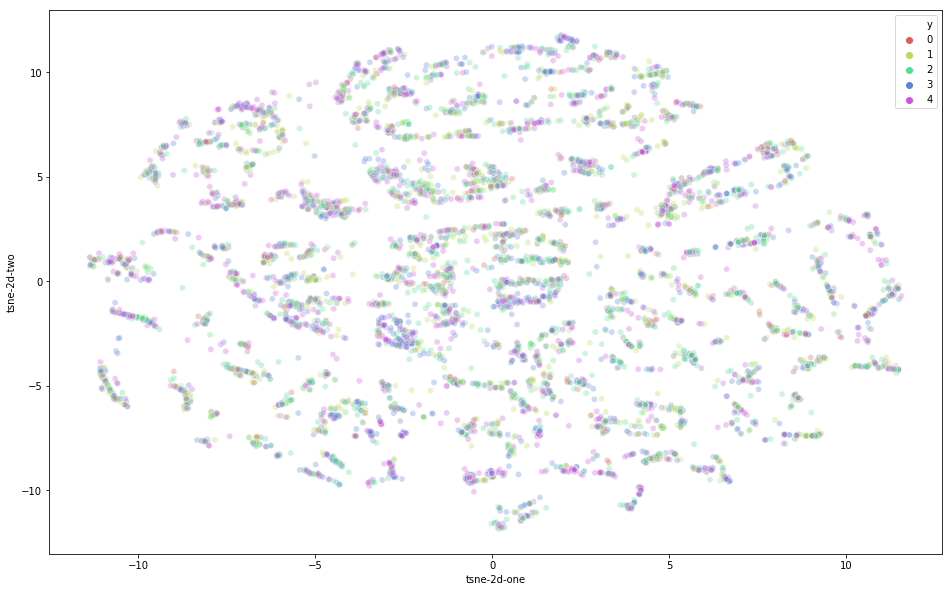

In [87]:

plt.figure(figsize=(16,10))
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="y",
    palette=sns.color_palette("hls", 5),
    data=df_subset,
    legend="full",
    alpha=0.3
)

In [144]:
pca = PCA(n_components=3)
pca_result = pca.fit_transform(x_train)


In [254]:
df = pd.DataFrame()
df['pca-one'] = pca_result[:,0]
df['pca-two'] = pca_result[:,1] 
df['pca-three'] = pca_result[:,2]
df['y'] = encoded
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))

Explained variation per principal component: [0.17750996 0.15045266 0.12195884]


In [316]:
clfT = LogisticRegression(multi_class='ovr', solver='liblinear', penalty='l2', max_iter=10)

In [317]:
clfT.fit(x_train, encoded)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=10, multi_class='ovr', n_jobs=None,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [318]:
print("training accuracy: ", clfT.score(x_train, encoded))
print("testing accuracy: ", clfT.score(x_test, encoded_test))

training accuracy:  0.3596766043456291
testing accuracy:  0.335033346410357


In [268]:
clfT.fit(testTs[:,0:2], testTs[:,3])

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=600, multi_class='ovr',
          n_jobs=None, penalty='l2', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)

In [255]:
testTs = df.to_numpy()

In [269]:
plotpca = PCA(n_components=2)
pca_test = plotpca.fit_transform(x_test)

In [270]:
clfT.score(pca_test,encoded_test)

0.28030600235386427

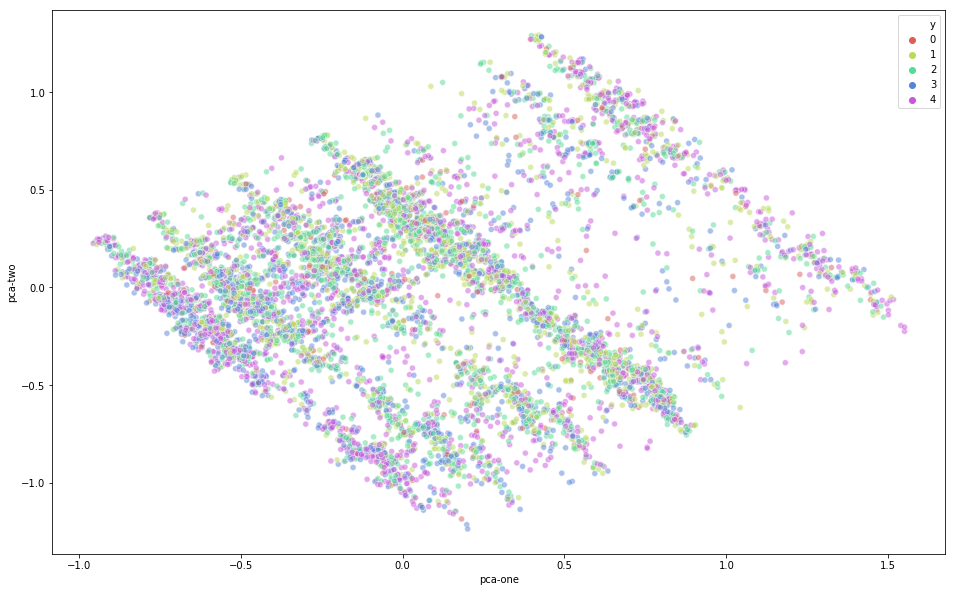

In [67]:
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="pca-one", y="pca-two",
    hue="y",
    palette=sns.color_palette("hls", 5),
    data=df,
    legend="full",
    alpha=0.5
)

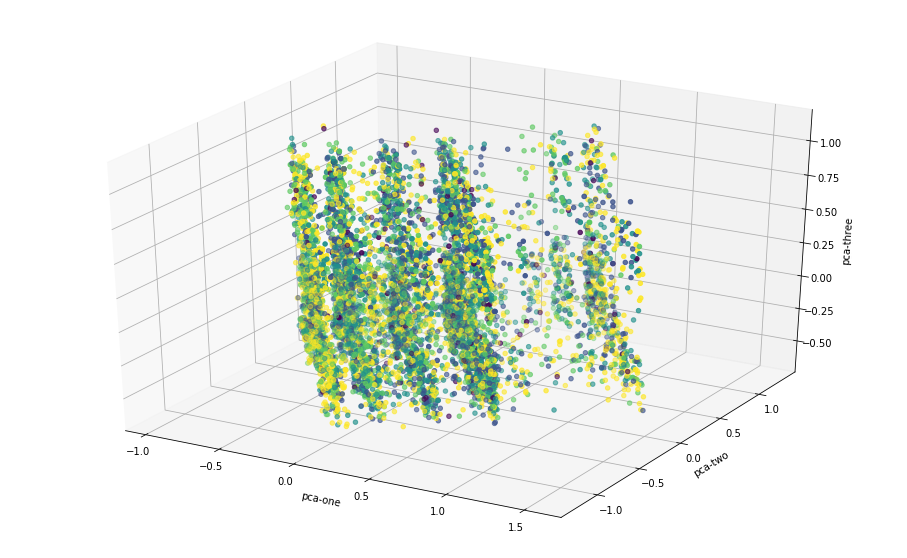

In [77]:
ax = plt.figure(figsize=(16,10)).gca(projection='3d')
ax.scatter(
    xs=df["pca-one"], 
    ys=df["pca-two"], 
    zs=df["pca-three"], 
    c=df["y"]
)
ax.set_xlabel('pca-one')
ax.set_ylabel('pca-two')
ax.set_zlabel('pca-three')
plt.show()

training score : 0.282 (multinomial)
training score : 0.282 (ovr)


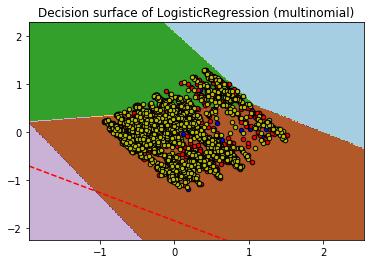

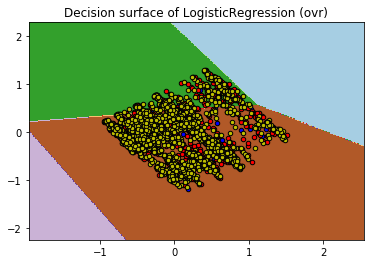

In [353]:
X = testTs[:,0:2]
y = encoded

for multi_class in ('multinomial', 'ovr'):
    clf = LogisticRegression(solver='newton-cg', max_iter=600, penalty='l2',
                             multi_class=multi_class).fit(X, y)

    # print the training scores
    print("training score : %.3f (%s)" % (clf.score(X, y), multi_class))

    # create a mesh to plot in
    h = .02  # step size in the mesh
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.contourf(xx, yy, Z, cmap=plt.cm.Paired)
    plt.title("Decision surface of LogisticRegression (%s)" % multi_class)
    plt.axis('tight')

    # Plot also the training points
    colors = "bry"
    for i, color in zip(clf.classes_, colors):
        idx = np.where(y == i)
        plt.scatter(X[idx, 0], X[idx, 1], c=color, cmap=plt.cm.Paired,
                    edgecolor='black', s=20)

    # Plot the three one-against-all classifiers
    xmin, xmax = plt.xlim()
    ymin, ymax = plt.ylim()
    coef = clf.coef_
    intercept = clf.intercept_

    def plot_hyperplane(c, color):
        def line(x0):
            return (-(x0 * coef[c, 0]) - intercept[c]) / coef[c, 1]
        
        plt.plot([xmin, xmax], [line(xmin), line(xmax)],
                 ls="--", color=color)

    for i, color in zip(clf.classes_, colors):
        plot_hyperplane(i, color)

plt.show()